Fourier Transfroms for All patients

In [2]:
#Import Modules
import sys
sys.path.append("..") #give this script access to all modules in parent directory
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import skew
from Data_Cleaning import preprocess
import Actigraph_Metrics
import Frequency_Domain

C:\Users\jakes\AppData\Local\Temp\ipykernel_3016\3090307715.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# signal parameters
freq = 100 #signal is 100hz

Load All Patient Data

In [3]:
#Change to Load data of interest
#data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'

data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'


#set params
slice_size_min = 10
lead_time = 5
window_size = 100 #100 is 1 second worth of time

In [4]:


#Change for data of interest
preprocess.load_and_segment_data(data_dir, slice_size_min, lead_time) #take sbs csv and accel gt3x to create a .mat file with vector magnitudes

Processing: Patient11
Loading actigraphy data


KeyboardInterrupt: 

1499975
The maximum frequency within the specified range is 0.1 Hz


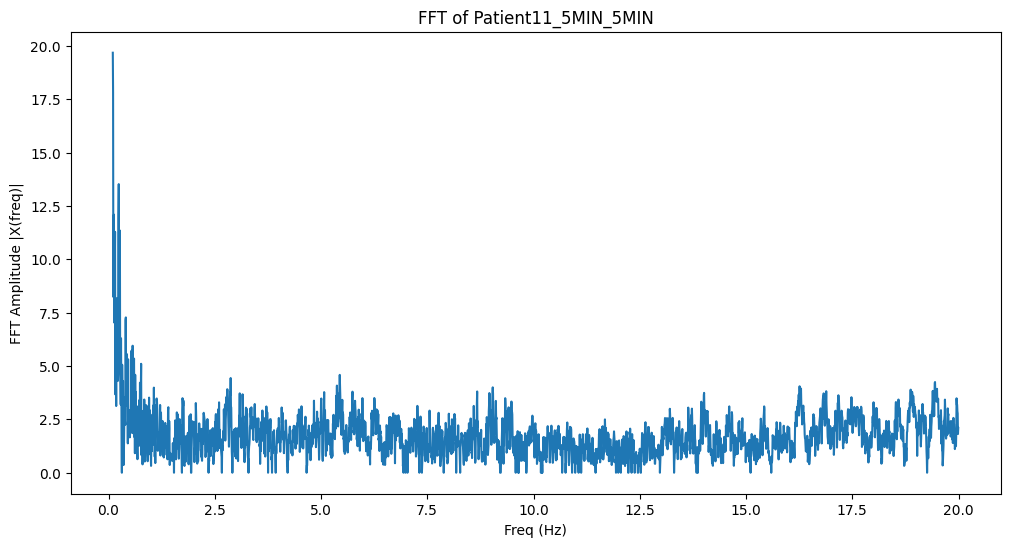

1139981
The maximum frequency within the specified range is 0.09649122807017543 Hz


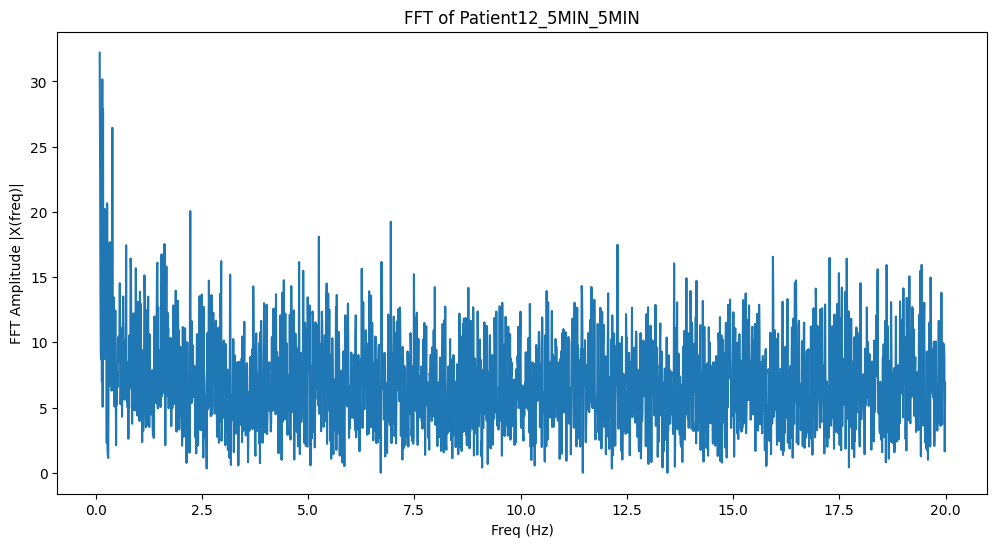

2519958
The maximum frequency within the specified range is 0.13095238095238096 Hz


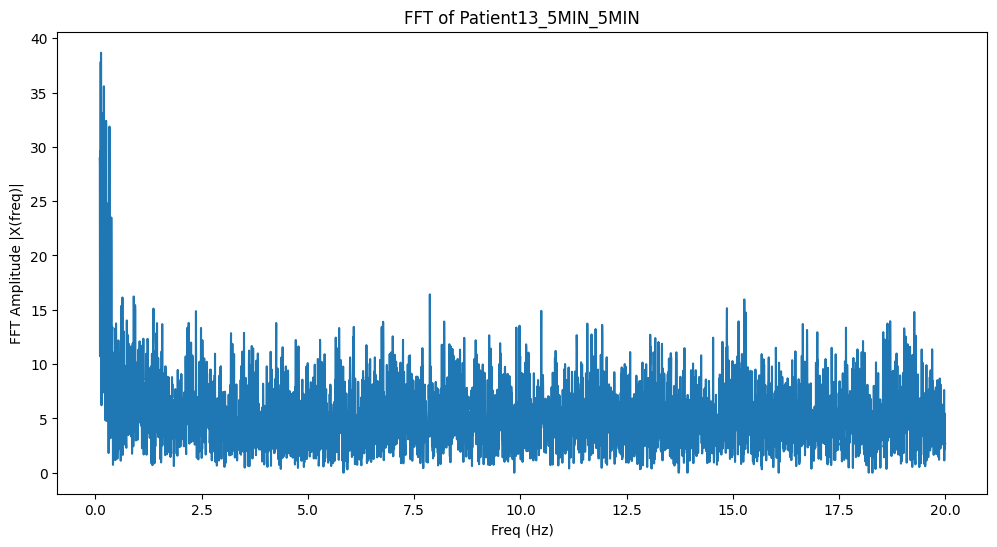

2219963
The maximum frequency within the specified range is 0.11711711711711711 Hz


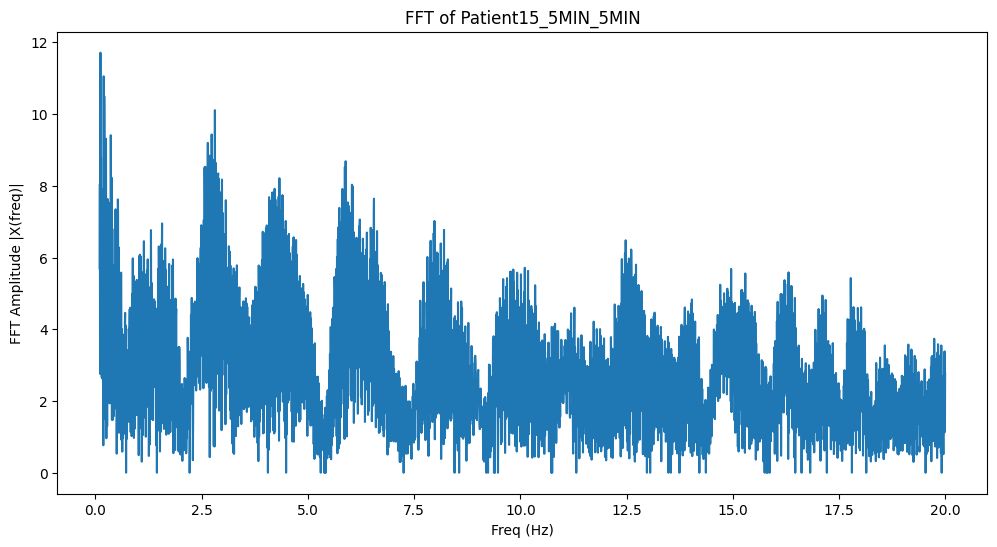

1739971
The maximum frequency within the specified range is 0.11494252873563218 Hz


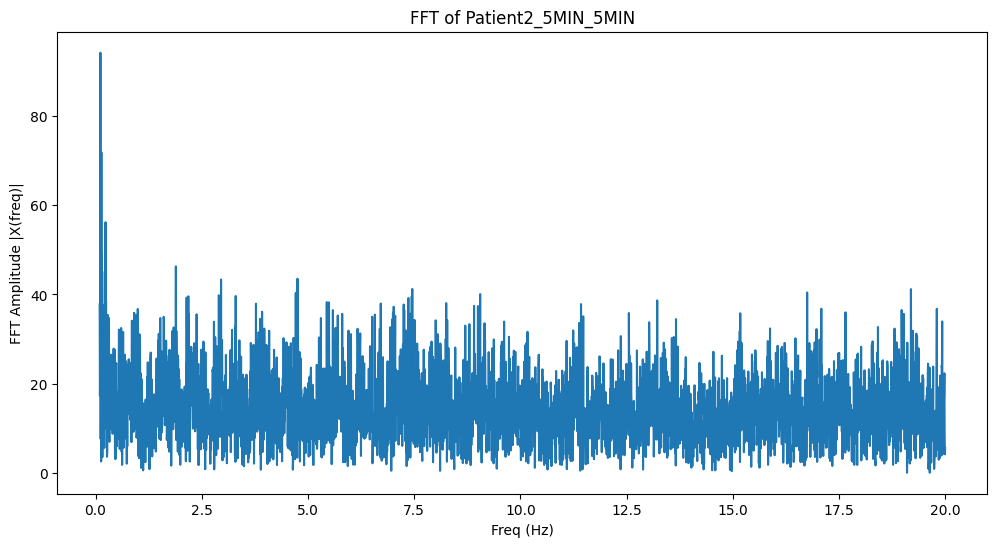

479992
The maximum frequency within the specified range is 0.10416666666666667 Hz


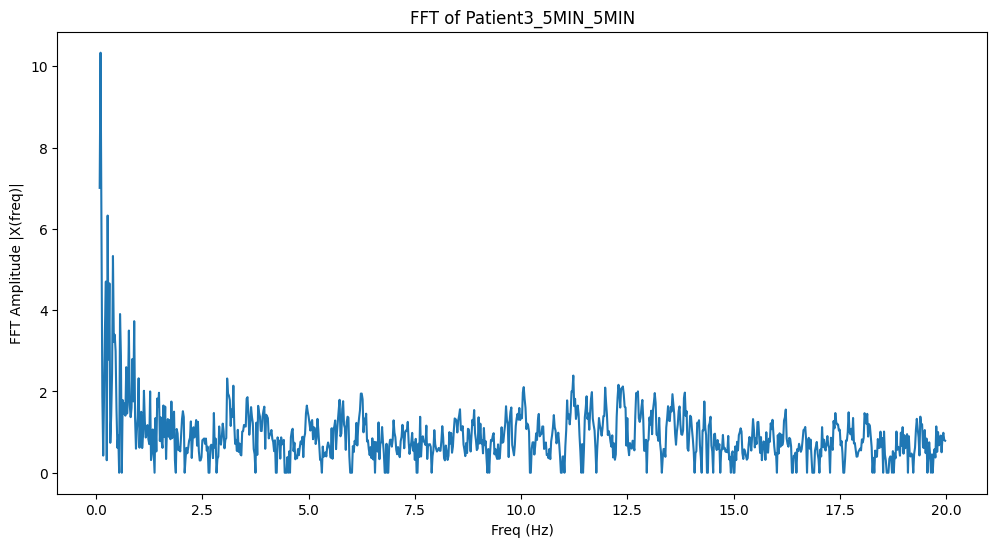

6959884
The maximum frequency within the specified range is 0.106323366715039 Hz


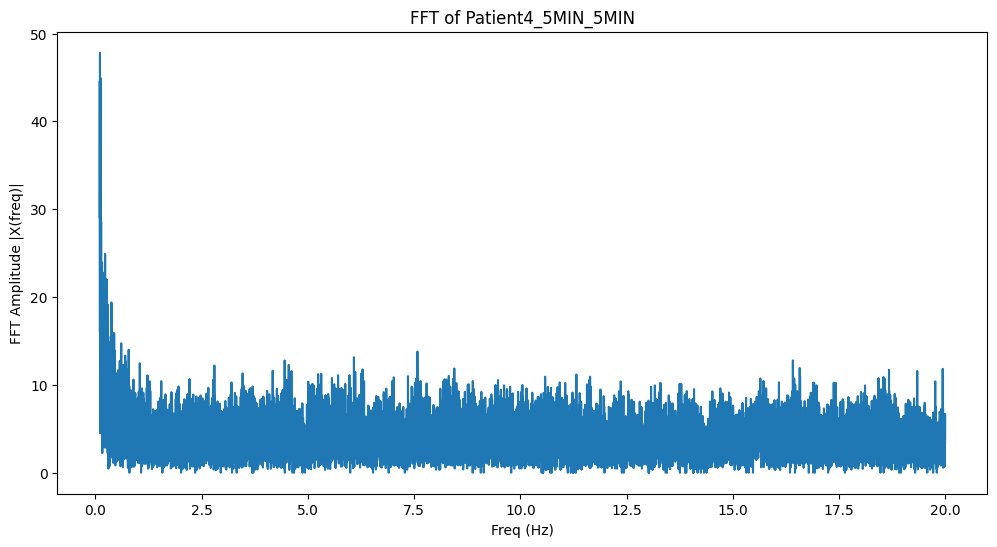

4079932
The maximum frequency within the specified range is 0.10784313725490197 Hz


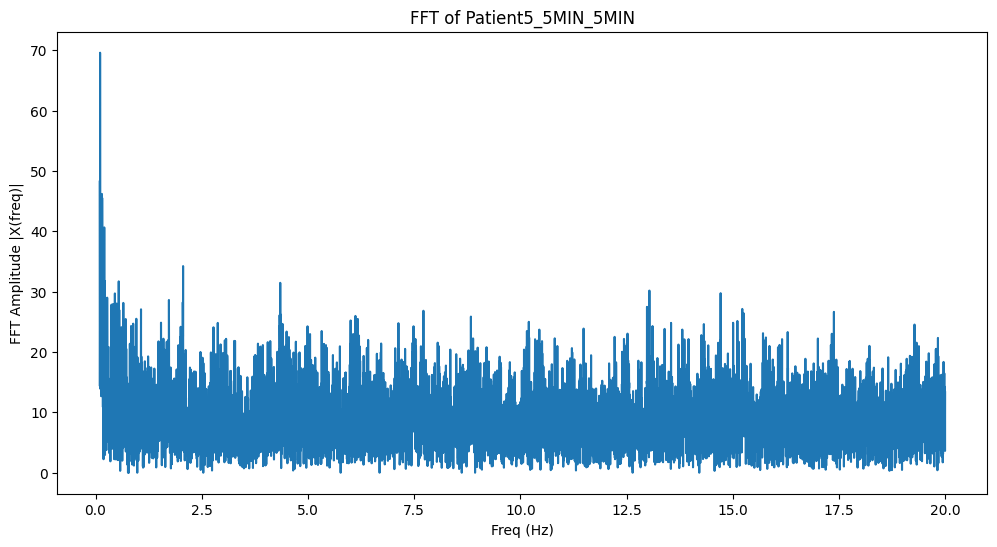

419993
The maximum frequency within the specified range is 0.11904761904761904 Hz


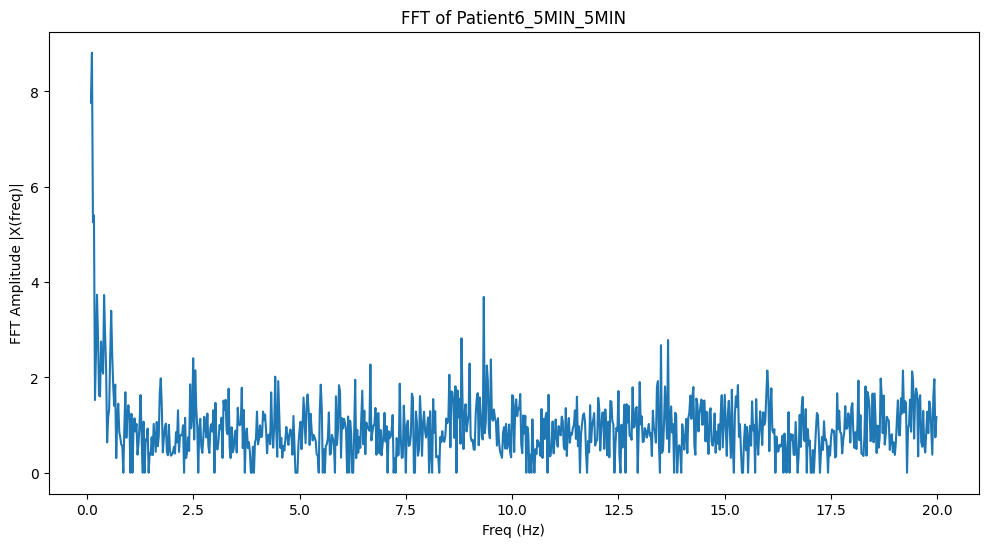

239996
The maximum frequency within the specified range is 0.20833333333333334 Hz


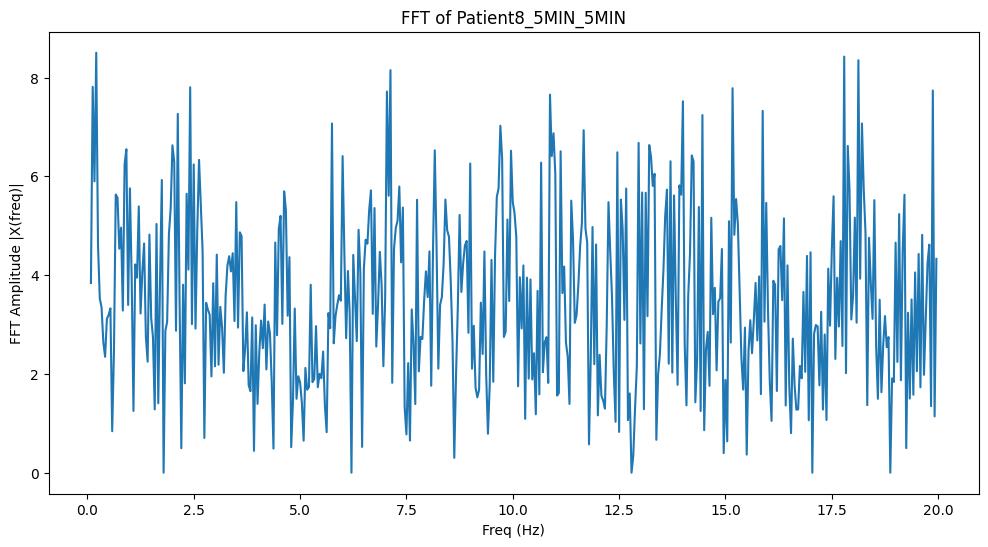

1439976
The maximum frequency within the specified range is 0.09722222222222222 Hz


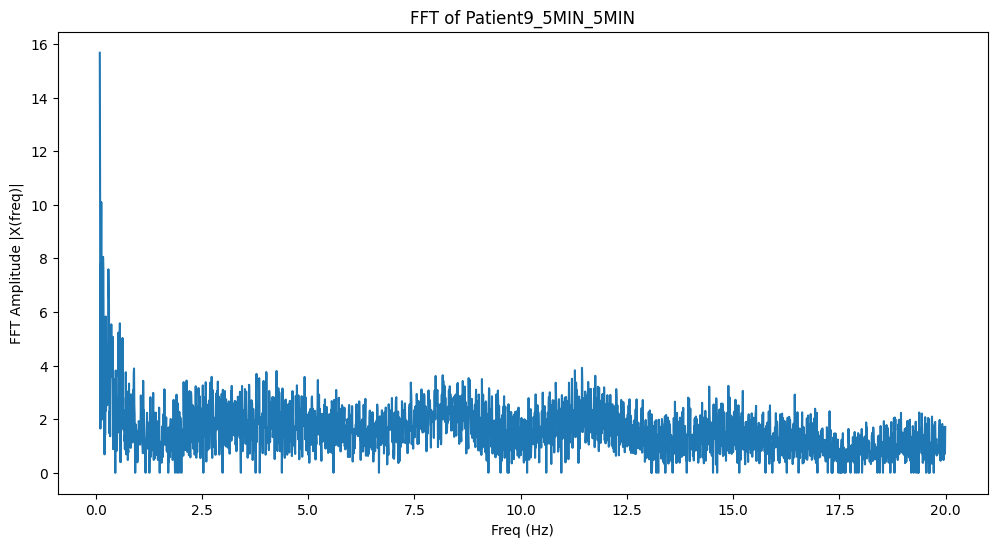

In [11]:
#There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
        # filter out non-directories
        patient_dir = os.path.join(data_dir, patient)
        if os.path.isdir(patient_dir):
            data_filepath = os.path.join(patient_dir, f'{patient}_{lead_time}MIN_{slice_size_min - lead_time}MIN.mat')
        data = loadmat(data_filepath)
        total_signal = data["x_mag"]
        #Use a specifc window from the signal array
        signal = []
        sampling_rate = 100
        #print(len(total_signal))
        for i in range(len(total_signal)):
              signal = np.append(signal, total_signal[i])
        print(len(signal))
        signal = signal[::sampling_rate]
        # #Generate FFT Data
        freqData, freqBins = Frequency_Domain.FFTData(signal,100)
        # #Plot FFT Data
        title = (f'FFT of {patient}_{lead_time}MIN_{slice_size_min - lead_time}MIN')
        Frequency_Domain.FFTPlot(freqData,freqBins, 100, lower_freq=.1, upper_freq=20, lower_cutoff=.3, upper_cutoff=100000,title= title)
        

